In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier     #KNN
from sklearn.linear_model import LogisticRegression    #Logistic Regression
from sklearn.tree import DecisionTreeClassifier        #Decision Tree
from sklearn.ensemble import RandomForestClassifier    #Random Forest
from sklearn.neural_network import MLPClassifier       #Neural Network
from sklearn.svm import SVC                            #SVM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
import matplotlib.pylab as p
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from random import randint
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve

# Introduction

# Project Goals

# Problem statement

In [ ]:

*  Analysis of whi will strokes
* Predict the analysis of the K nearest neighbors classifier model and confusion matrix 
* Predict the analysis of the logistic regression model
* predict the analysis of the random forest classifier
* Predict the analysis of the decision tree classifier
* Predict the analysis of the support vector machine algorithm
* All five algorithms predict which one is giving you more accuracy

In [3]:
###Loading a data into a dataframe
data = pd.read_csv('full_data.csv')
data
#https://www.kaggle.com/code/raphaelmarconato/brain-stroke-eda-balancing-and-ml#-3.-Model-Building.-

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


# Data cleaning

In [4]:
data.isnull().sum().max()

0

# Exploaratory analysis

Text(0, 0.5, 'Count of Patients')

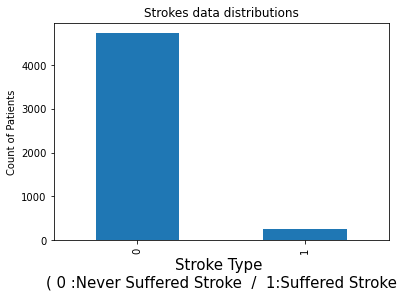

In [40]:
data['stroke'].value_counts().plot(kind='bar')
plt.title('Strokes data distributions')
plt.xlabel('Stroke Type \n( 0 :Never Suffered Stroke  /  1:Suffered Stroke',fontsize=15)
plt.ylabel('Count of Patients')

In [41]:
Our target variable is stroke.

SyntaxError: invalid syntax (<ipython-input-41-b003aa8e8230>, line 1)

<AxesSubplot:>

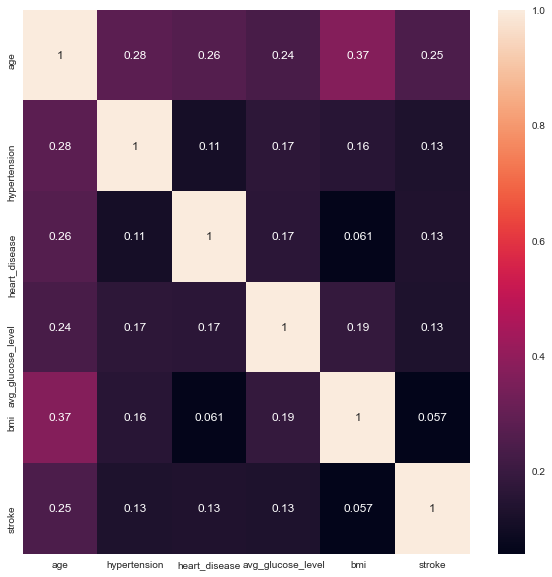

In [5]:
plt.figure(figsize=(10,10))
corr=data.corr()
           
sns.heatmap(corr,annot = True)


In [43]:
Checking the correlation between  our variables we can see that we dont have a strong correlation between the variables

SyntaxError: invalid syntax (<ipython-input-43-0df245e73a3a>, line 1)

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

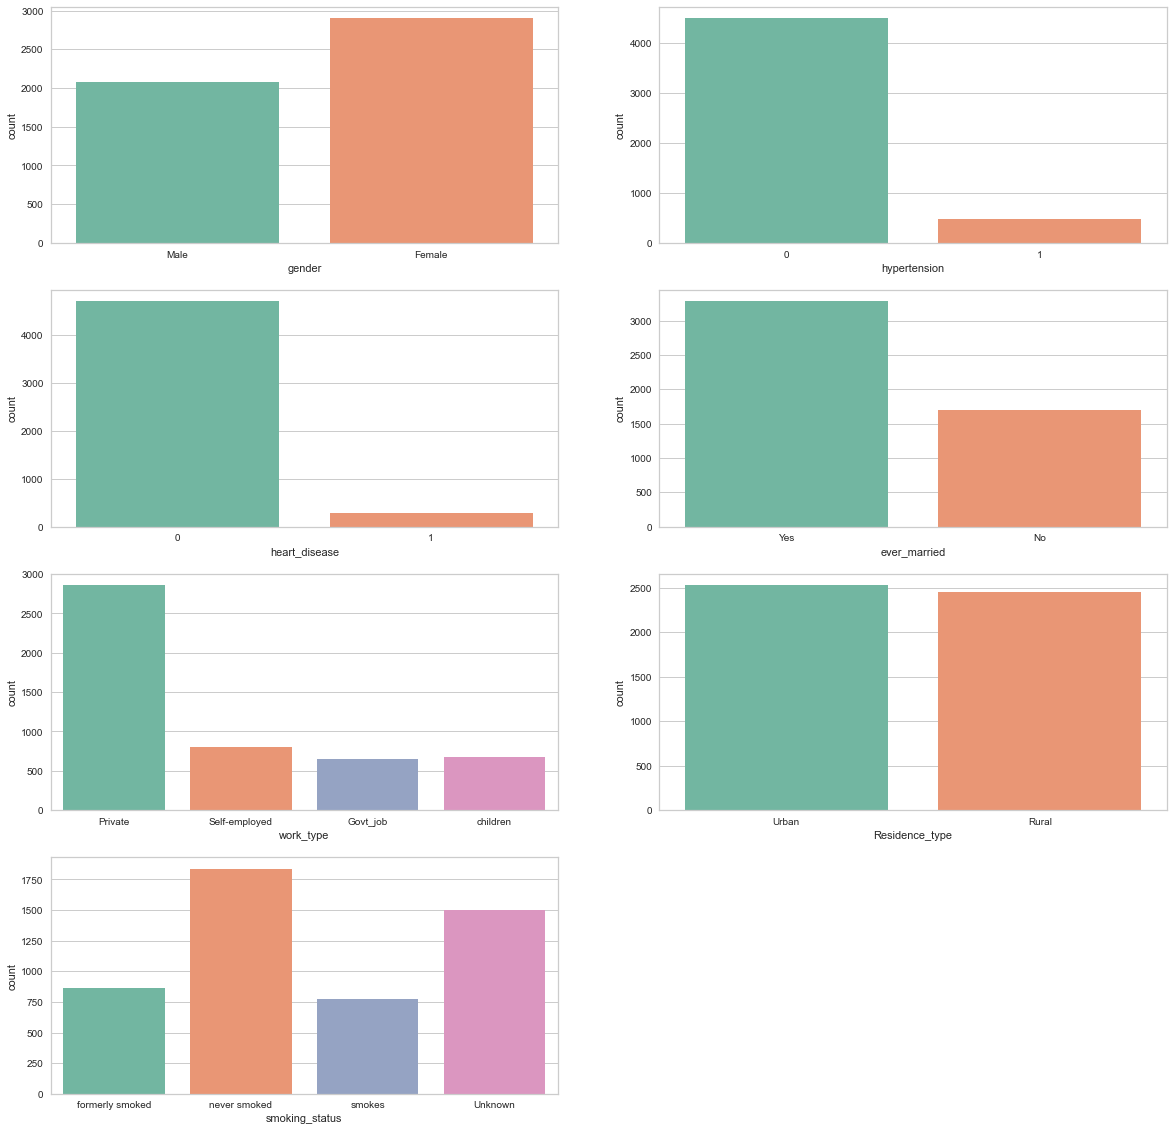

In [3]:
plt.figure(figsize = (20,20))

plt.subplot(4,2,1)
sns.countplot(x = 'gender', palette='Set2', data = data)

plt.subplot(4,2,2)
sns.countplot(x = 'hypertension', palette='Set2', data = data)


plt.subplot(4,2,3)
sns.countplot(x = 'heart_disease', palette='Set2', data = data)

plt.subplot(4,2,4)
sns.countplot(x = 'ever_married', palette='Set2', data = data)
plt.subplot(4,2,5)
sns.countplot(x = 'work_type', palette='Set2', data = data)

plt.subplot(4,2,6)
sns.countplot(x = 'Residence_type', palette='Set2', data = data)

plt.subplot(4,2,7)
sns.countplot(x = 'smoking_status', palette='Set2', data = data)


<AxesSubplot:xlabel='stroke', ylabel='count'>

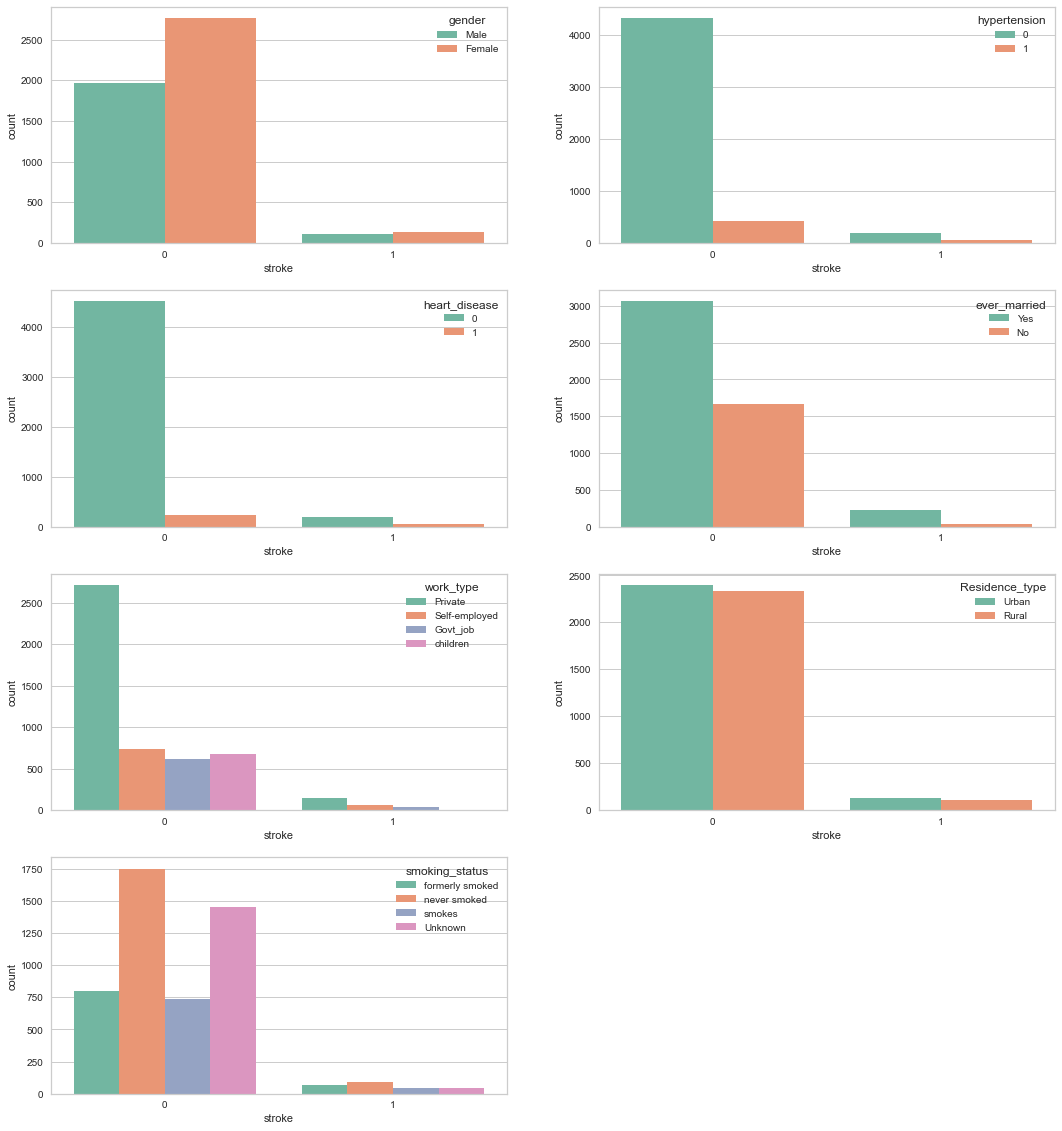

In [4]:
plt.figure(figsize = (18,20))

plt.subplot(4,2,1)
sns.countplot(x = 'stroke', hue= 'gender', palette='Set2', data = data)

plt.subplot(4,2,2)
sns.countplot(x = 'stroke', hue= 'hypertension', palette='Set2', data = data)

plt.subplot(4,2,3)
sns.countplot(x = 'stroke', hue= 'heart_disease', palette='Set2', data = data)

plt.subplot(4,2,4)
sns.countplot(x = 'stroke', hue= 'ever_married', palette='Set2', data = data)

plt.subplot(4,2,5)
sns.countplot(x = 'stroke', hue= 'work_type', palette='Set2', data = data)

plt.subplot(4,2,6)
sns.countplot(x = 'stroke', hue= 'Residence_type', palette='Set2', data = data)

plt.subplot(4,2,7)
sns.countplot(x = 'stroke', hue= 'smoking_status', palette='Set2', data = data)


C:\Users\pushp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


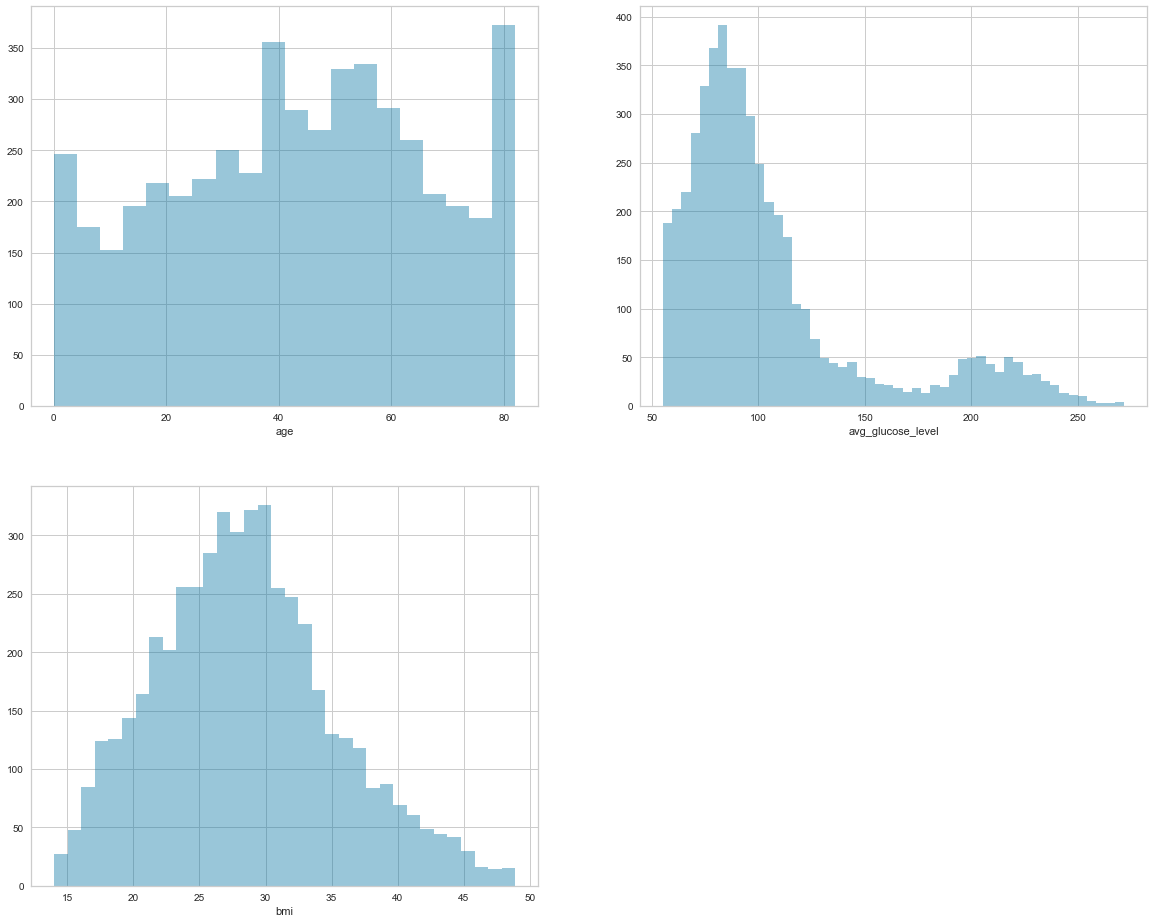

In [5]:
plt.figure(figsize = (20,25))



plt.subplot(3,2,1)
sns.distplot(data.age, kde = False)

plt.subplot(3,2,2)
sns.distplot(data.avg_glucose_level, kde = False)

plt.subplot(3,2,3)
sns.distplot(data.bmi, kde = False)
plt.savefig("con.png")

In [47]:
#plt.figure(figsize = (20,25))
#plt.subplot(4,2,1)
#sns.catplot(x = "stroke", y = "age", palette = "Set2", data = data)
#plt.subplot(4,2,2)
#sns.catplot(x = "stroke", y = "bmi", palette = "Set2", data = data)
#plt.subplot(4,2,2)
#sns.catplot(x = "stroke", y = "avg_glucose_level", palette = "Set2", data = data)


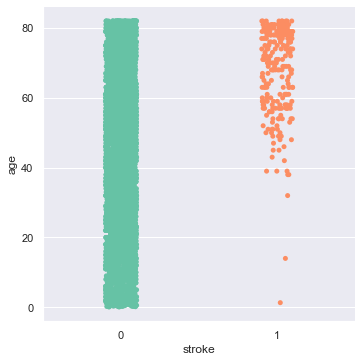

In [24]:
sns.catplot(x = "stroke", y = "age", palette = "Set2", data = data)

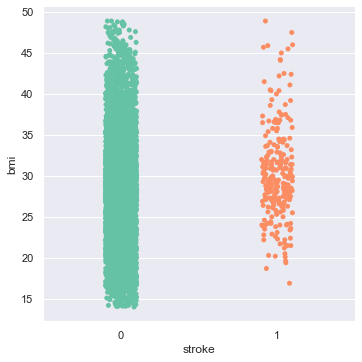

In [26]:
sns.catplot(x = "stroke", y = "bmi", palette = "Set2", data = data)

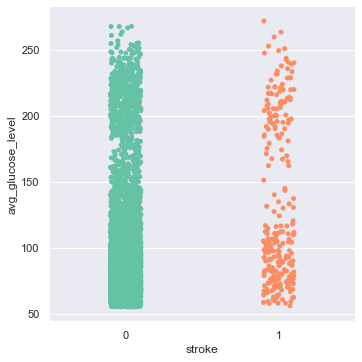

In [27]:
sns.catplot(x = "stroke", y = "avg_glucose_level", palette = "Set2", data = data)

# Preparing Data

In [6]:
dataset = pd.get_dummies(data)
dataset.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0
1,80.0,0,1,105.92,32.5,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0
2,49.0,0,0,171.23,34.4,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1
3,79.0,1,0,174.12,24.0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0
4,81.0,0,0,186.21,29.0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0


In [7]:
dataset['stroke'].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

In [ ]:
Strokes is our target variable 

In [8]:
# Separating Data
X=dataset.drop(['stroke'],axis=1)
y=dataset['stroke']
# Splitting the dataset to Train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [9]:
#to know the shape of the train and test dataset.
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3486, 19)
(3486,)
(1495, 19)
(1495,)


# Model classifier

In [10]:
#Scaling X data
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
###KNN classifier
#KNN = KNeighborsClassifier(n_neighbors=5)
#KNN.fit(X_train, y_train)
#y_pred = KNN.predict(X_test)
###Confusion matrix
#from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))

SyntaxError: cannot assign to literal (<ipython-input-29-e87507bc3e83>, line 2)

In [15]:
stroke=["stroke0","stroke1"]
classifiers=[
KNeighborsClassifier()]

In [16]:
def ROC_viz():    
    def ROC(model,stroke):
        visualizer = ROCAUC(model, stroke=stroke)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        ROC(name,stroke)

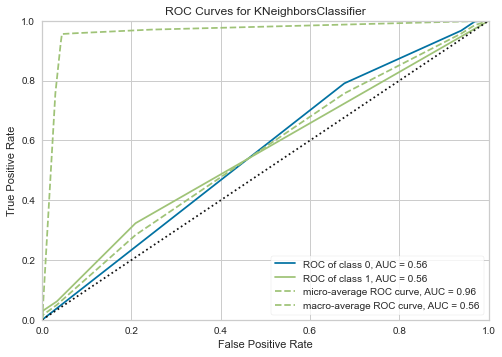

In [17]:
visualization =[ROC_viz()]

In [54]:
Confusion  matrix helps in identifying the accuracy of the model classifier by classifying True Poistive,
True Negative, False Positive and False Negative values. The left most part gives the result for the training
dataset the 70% of the actual dataset. The middle part gives the result for the testing dataset. The right most
part is the prediction for the actual dataset.


SyntaxError: invalid syntax (<ipython-input-54-388cec2ce310>, line 1)

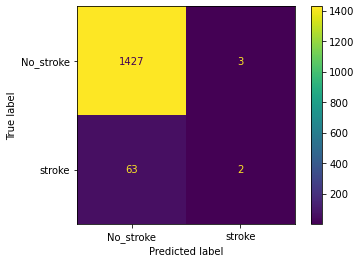

In [55]:
cm=confusion_matrix(y_test, y_pred)
cmf =ConfusionMatrixDisplay(cm,display_labels=('No_stroke','stroke'))
cmf.plot()

In [30]:
# select classifiers 
classifiers=[
KNeighborsClassifier(),
GaussianNB()]

stroke=["Stroke0","Stroke1"]

In [35]:

def ROC_viz():    
    def ROC(model,stroke):
        visualizer = ROCAUC(model, stroke=stroke)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        ROC(name,stroke)        

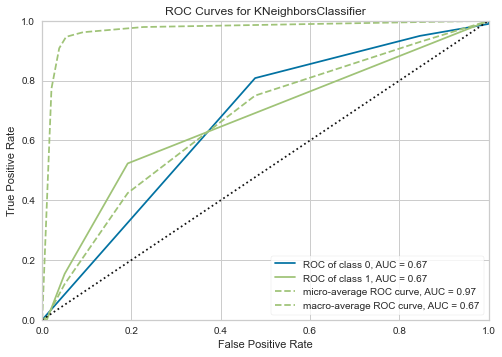

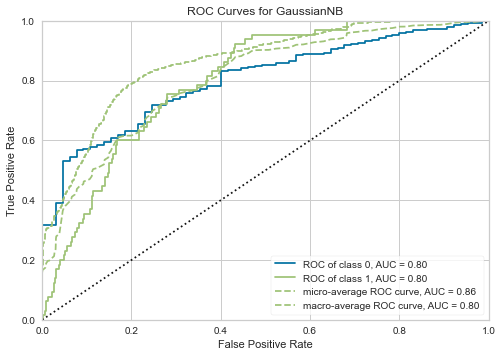

In [36]:
visualization =[ROC_viz()]

In [ ]:
Cross Validation Matrix :

0.9565217391304348
[[1430    0]
 [  65    0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1430
           1       0.00      0.00      0.00        65

    accuracy                           0.96      1495
   macro avg       0.48      0.50      0.49      1495
weighted avg       0.91      0.96      0.94      1495



C:\Users\pushp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


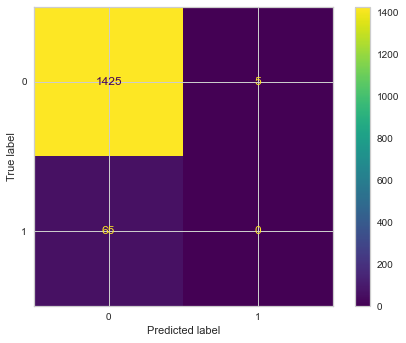

In [20]:
LR=LogisticRegression()
LR.fit(X_train, y_train)
predictions1 = LR.predict(X_test)
print(accuracy_score(y_test, predictions1))
print(confusion_matrix(y_test, predictions1))
print(classification_report(y_test, predictions1))
cm1=confusion_matrix(y_test, y_pred)
cmf1 =ConfusionMatrixDisplay(cm1,display_labels=('0','1'))
cmf1.plot()

0.9531772575250836
[[1425    5]
 [  65    0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1430
           1       0.00      0.00      0.00        65

    accuracy                           0.95      1495
   macro avg       0.48      0.50      0.49      1495
weighted avg       0.91      0.95      0.93      1495



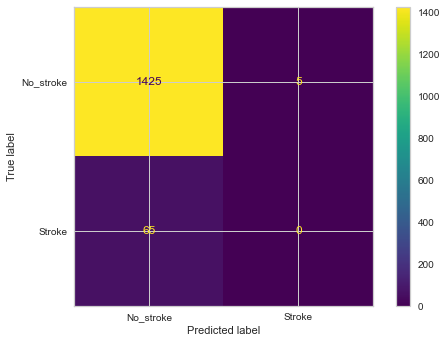

In [19]:
RF=RandomForestClassifier()
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm2=confusion_matrix(y_test, y_pred)
cmf2 =ConfusionMatrixDisplay(cm2,display_labels=('No_stroke','Stroke'))
cmf2.plot()

[[1426    4]
 [  65    0]]


In [26]:
# decision tree algorithm
tree = DecisionTreeClassifier() 
tree.fit(X_train, y_train)
print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.') 
print(f'Model Accuracy: {tree.score(X_train, y_train)}')
y_pred = tree.predict(X_test) 
print(classification_report(y_test,y_pred))

Decision tree has 503 nodes with maximum depth 21.
Model Accuracy: 1.0
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1430
           1       0.12      0.17      0.14        65

    accuracy                           0.91      1495
   macro avg       0.54      0.56      0.55      1495
weighted avg       0.93      0.91      0.92      1495



In [14]:
from sklearn import svm

clf = svm.SVC()

clf.fit(X_train,y_train)

predicted_labels = clf.predict(X_test)

from sklearn.metrics import confusion_matrix

def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels]+[5]) # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print ("    " + empty_cell,)
    for label in labels:
        print ("%{0}s".format(columnwidth) % label,)
    print
    # Print rows
    for i, label1 in enumerate(labels):
        print ("    %{0}s".format(columnwidth) % label1,)
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print (cell,)
        print

conf = confusion_matrix(y_test, y_pred)

In [31]:
def accuracy(conf):
    total_correct = 0.
    nb_classes = conf.shape[0]
    for i in np.arange(0,nb_classes):
        total_correct += conf[i][i]
    acc = total_correct/sum(sum(conf))
    return acc

print('FP classification accuracy = %f' % accuracy(conf))

FP classification accuracy = 0.912375


In [33]:
print ('\n clasification report:\n', classification_report(y_test, y_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))


 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      1430
           1       0.12      0.17      0.14        65

    accuracy                           0.91      1495
   macro avg       0.54      0.56      0.55      1495
weighted avg       0.93      0.91      0.92      1495


 confussion matrix:
 [[1353   77]
 [  54   11]]


# Conclusion

In [31]:
accuracies={"knn": KNN_accuracy,
            "lr": Logistic_accuracy}

#Plot accuracy for different models
plt.figure(figsize=(14,6))
plt.bar(accuracies.keys(),accuracies.values(),label="Accuracy")
plt.xlabel("Classifier Used")
plt.ylabel("Accuracy (%)")
plt.ylim(90,100)
plt.legend()
plt.tight_layout()
plt.show()
print(accuracies)

NameError: name 'KNN_accuracy' is not defined